In [3]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Dataset Overview:
                                             Concept  \
0        carbohydrate storage (Physiologic Function)   
1  regulation of CD4-positive, alpha-beta T cell ...   
2  positive regulation of dendrite extension (pos...   
3  positive regulation of cold-induced thermogene...   
4  Vomiting or Dry Heaves Interfered With Appetit...   

                                         Description  
0  carbohydrate localization described as the acc...  
1  regulation of CD4-positive, alpha-beta T cell ...  
2  something described as any process that activa...  
3  regulation of cold-induced thermogenesis descr...  
4  Intellectual Product described as a question a...  


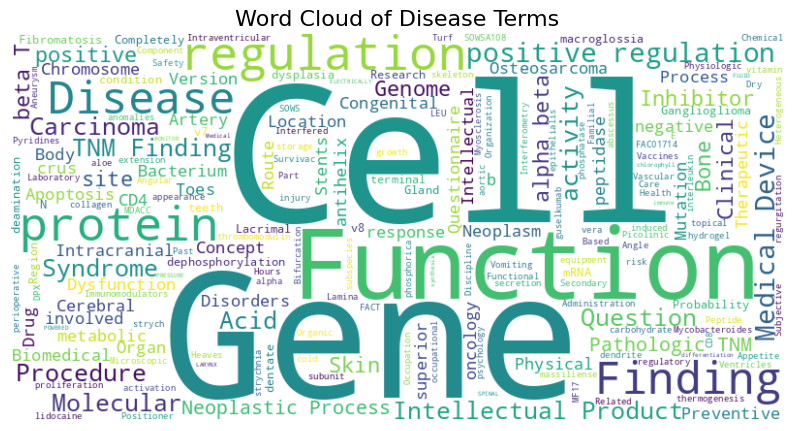

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-10-4e9c620e91c9>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=top_words, palette="viridis")


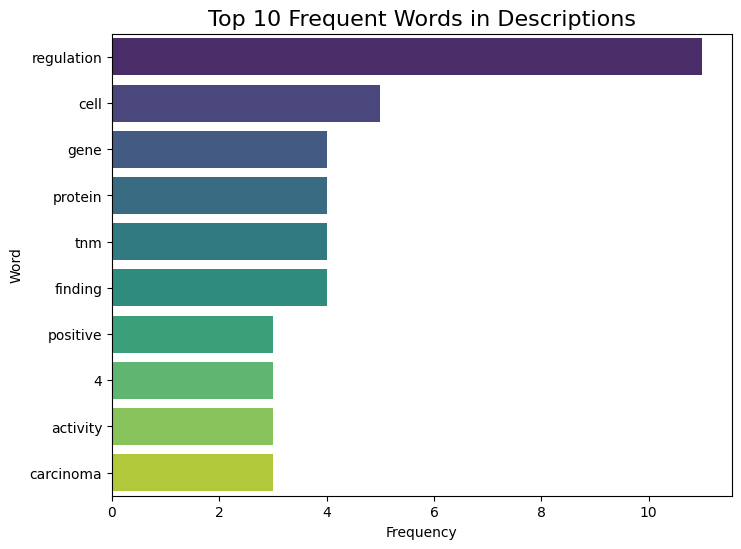

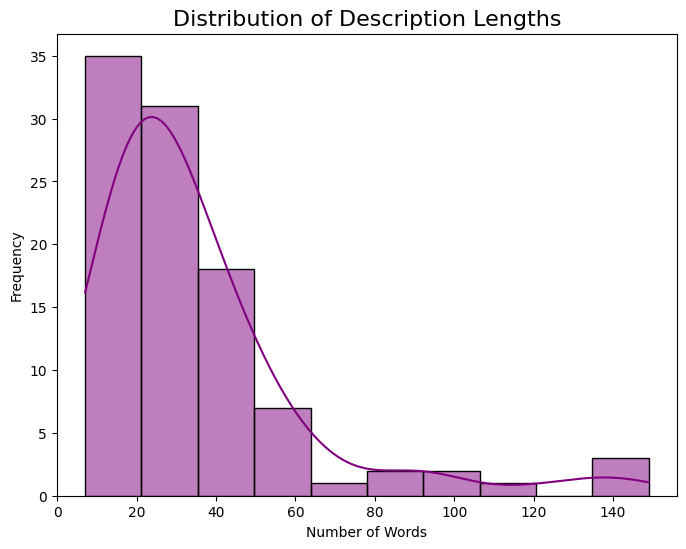

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk

# Load the dataset
data = pd.read_csv('first_100_records.csv')

# Data Overview
print("Dataset Overview:")
print(data.head())

# Generate Word Cloud from Descriptions
def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400,
        colormap="viridis"
    ).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# Combine all descriptions into one string
description_text = " ".join(data["Concept"].values)
generate_wordcloud(description_text, "Word Cloud of Disease Terms")

# Plot Frequency of Words
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
words = description_text.lower().split()
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
word_counts = Counter(filtered_words)

# Top 10 Words
top_words = pd.DataFrame(word_counts.most_common(10), columns=["Word", "Frequency"])
plt.figure(figsize=(8, 6))
sns.barplot(x="Frequency", y="Word", data=top_words, palette="viridis")
plt.title("Top 10 Frequent Words in Descriptions", fontsize=16)
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

# Length Distribution of Descriptions
data['Description_Length'] = data['Description'].str.split().apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(data['Description_Length'], bins=10, kde=True, color="purple")
plt.title("Distribution of Description Lengths", fontsize=16)
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


Dataset Overview:
       PMID  StartIndex  EndIndex                        MentionTextSegment  \
0  25763772         0.0       5.0                                     DCTN4   
1  25763772         0.0       5.0                                     DCTN4   
2  25763772        23.0      63.0  chronic Pseudomonas aeruginosa infection   
3  25763772        67.0      82.0                           cystic fibrosis   
4  25763772        83.0     120.0     Pseudomonas aeruginosa (Pa) infection   

  SemanticTypeID  EntityID                  MatchingContent  
0           T116  C4308010  Amino Acid, Peptide, or Protein  
1           T123  C4308010    Biologically Active Substance  
2           T047  C0854135              Disease or Syndrome  
3           T047  C0010674              Disease or Syndrome  
4           T047  C0854135              Disease or Syndrome  


<ipython-input-11-af906efafc4a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


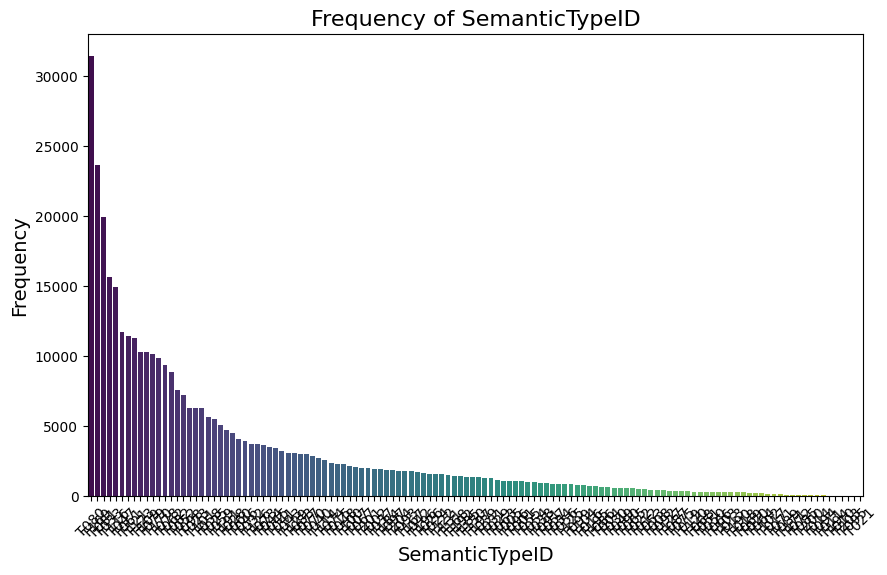

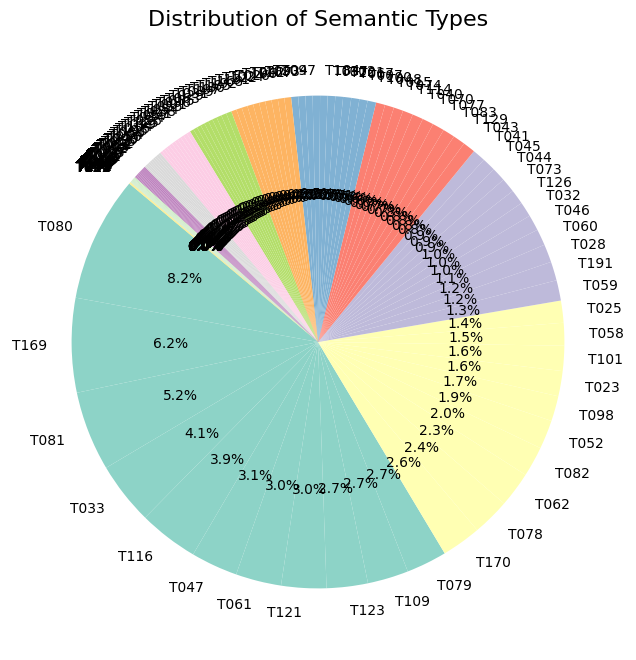

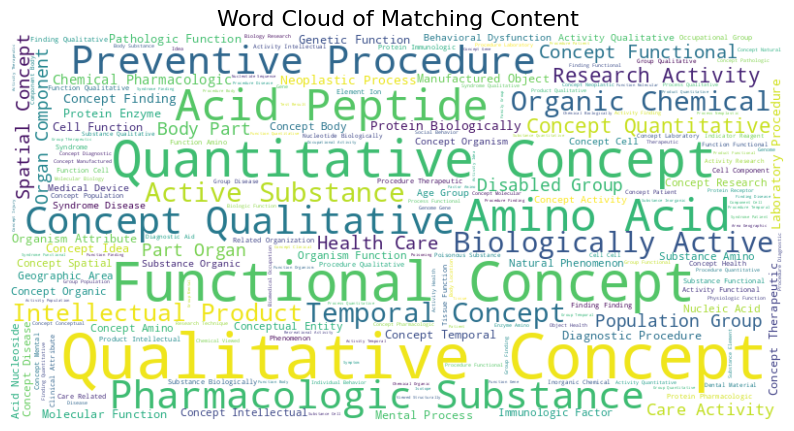

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv("MedMentions_Dataset.csv")

# Overview of the data
print("Dataset Overview:")
print(data.head())

# 1. Entity Frequency Bar Plot
semantic_type_counts = data['SemanticTypeID'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=semantic_type_counts.index,
    y=semantic_type_counts.values,
    palette="viridis"
)
plt.title("Frequency of SemanticTypeID", fontsize=16)
plt.xlabel("SemanticTypeID", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 2. Semantic Types Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
semantic_type_counts.plot.pie(autopct="%1.1f%%", startangle=140, cmap="Set3")
plt.title("Distribution of Semantic Types", fontsize=16)
plt.ylabel("")  # Remove default y-label
plt.show()

# 3. Word Cloud of Matching Content
matching_content_text = " ".join(data["MatchingContent"].dropna().values)

def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400,
        colormap="viridis"
    ).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

generate_wordcloud(matching_content_text, "Word Cloud of Matching Content")


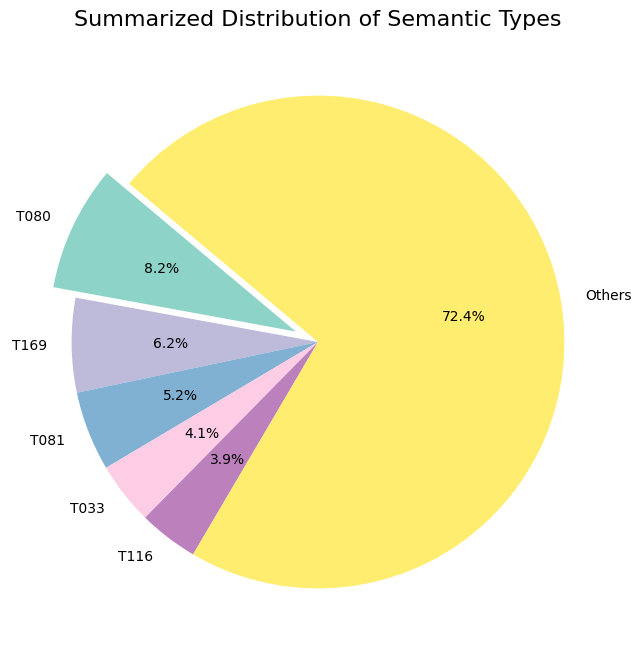

<ipython-input-12-34e0d8f85c00>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


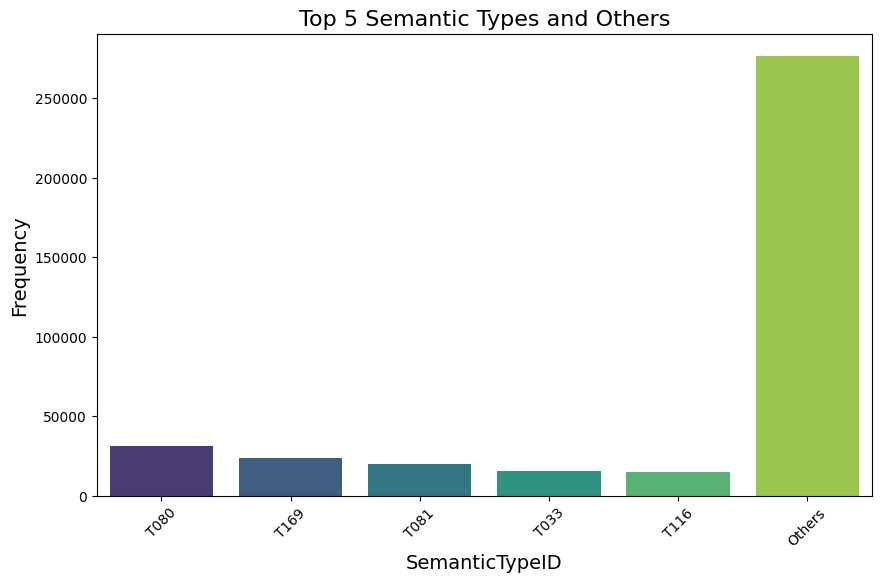

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv("MedMentions_Dataset.csv")

# 1. Summarize SemanticTypeID Distribution
semantic_type_counts = data['SemanticTypeID'].value_counts()

# Retain top 5 categories and group the rest as "Others"
top_n = 5
semantic_type_summary = semantic_type_counts.head(top_n).copy()
semantic_type_summary["Others"] = semantic_type_counts.iloc[top_n:].sum()

# Create a summarized pie chart
plt.figure(figsize=(8, 8))
semantic_type_summary.plot.pie(
    autopct="%1.1f%%",
    startangle=140,
    cmap="Set3",
    explode=[0.1 if i == 0 else 0 for i in range(len(semantic_type_summary))]
)
plt.title("Summarized Distribution of Semantic Types", fontsize=16)
plt.ylabel("")  # Remove default y-label
plt.show()

# 2. Bar Chart for Top Semantic Types
plt.figure(figsize=(10, 6))
sns.barplot(
    x=semantic_type_summary.index,
    y=semantic_type_summary.values,
    palette="viridis"
)
plt.title("Top 5 Semantic Types and Others", fontsize=16)
plt.xlabel("SemanticTypeID", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.show()


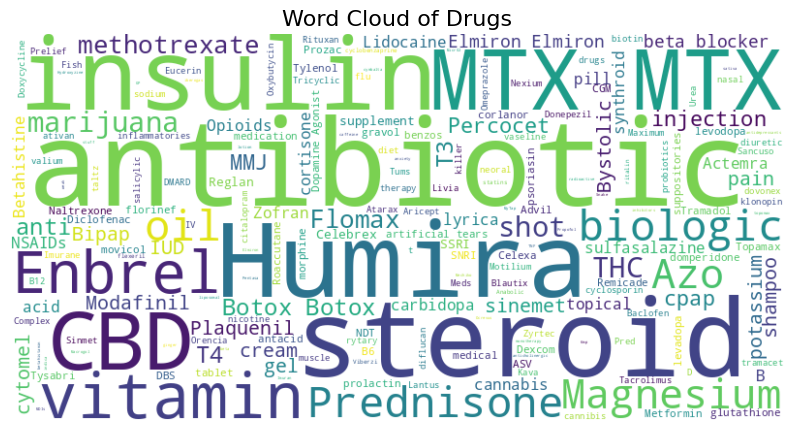

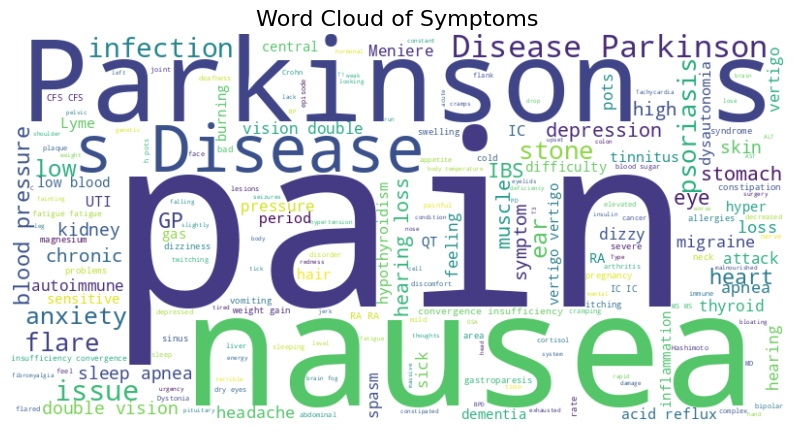

<ipython-input-13-71ba33f591dc>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


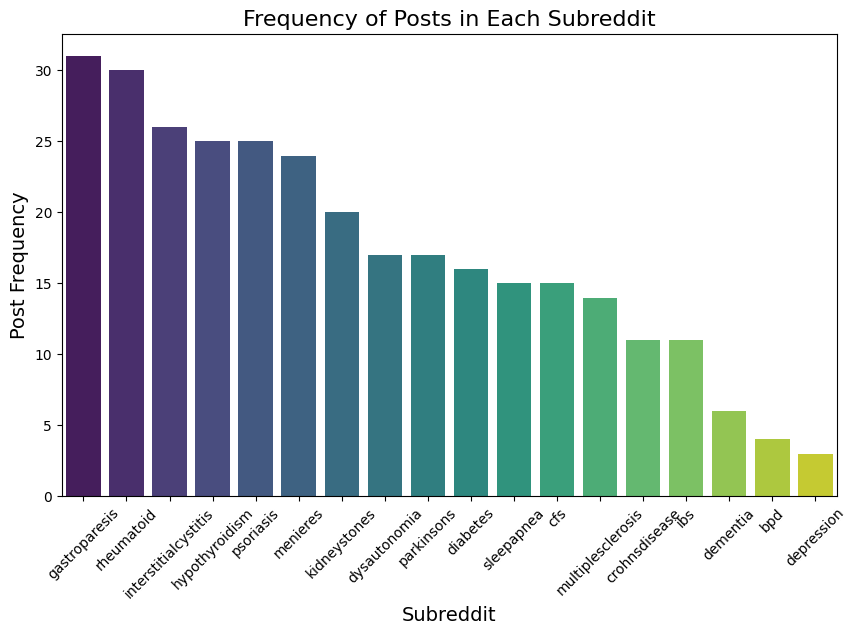

<ipython-input-13-71ba33f591dc>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


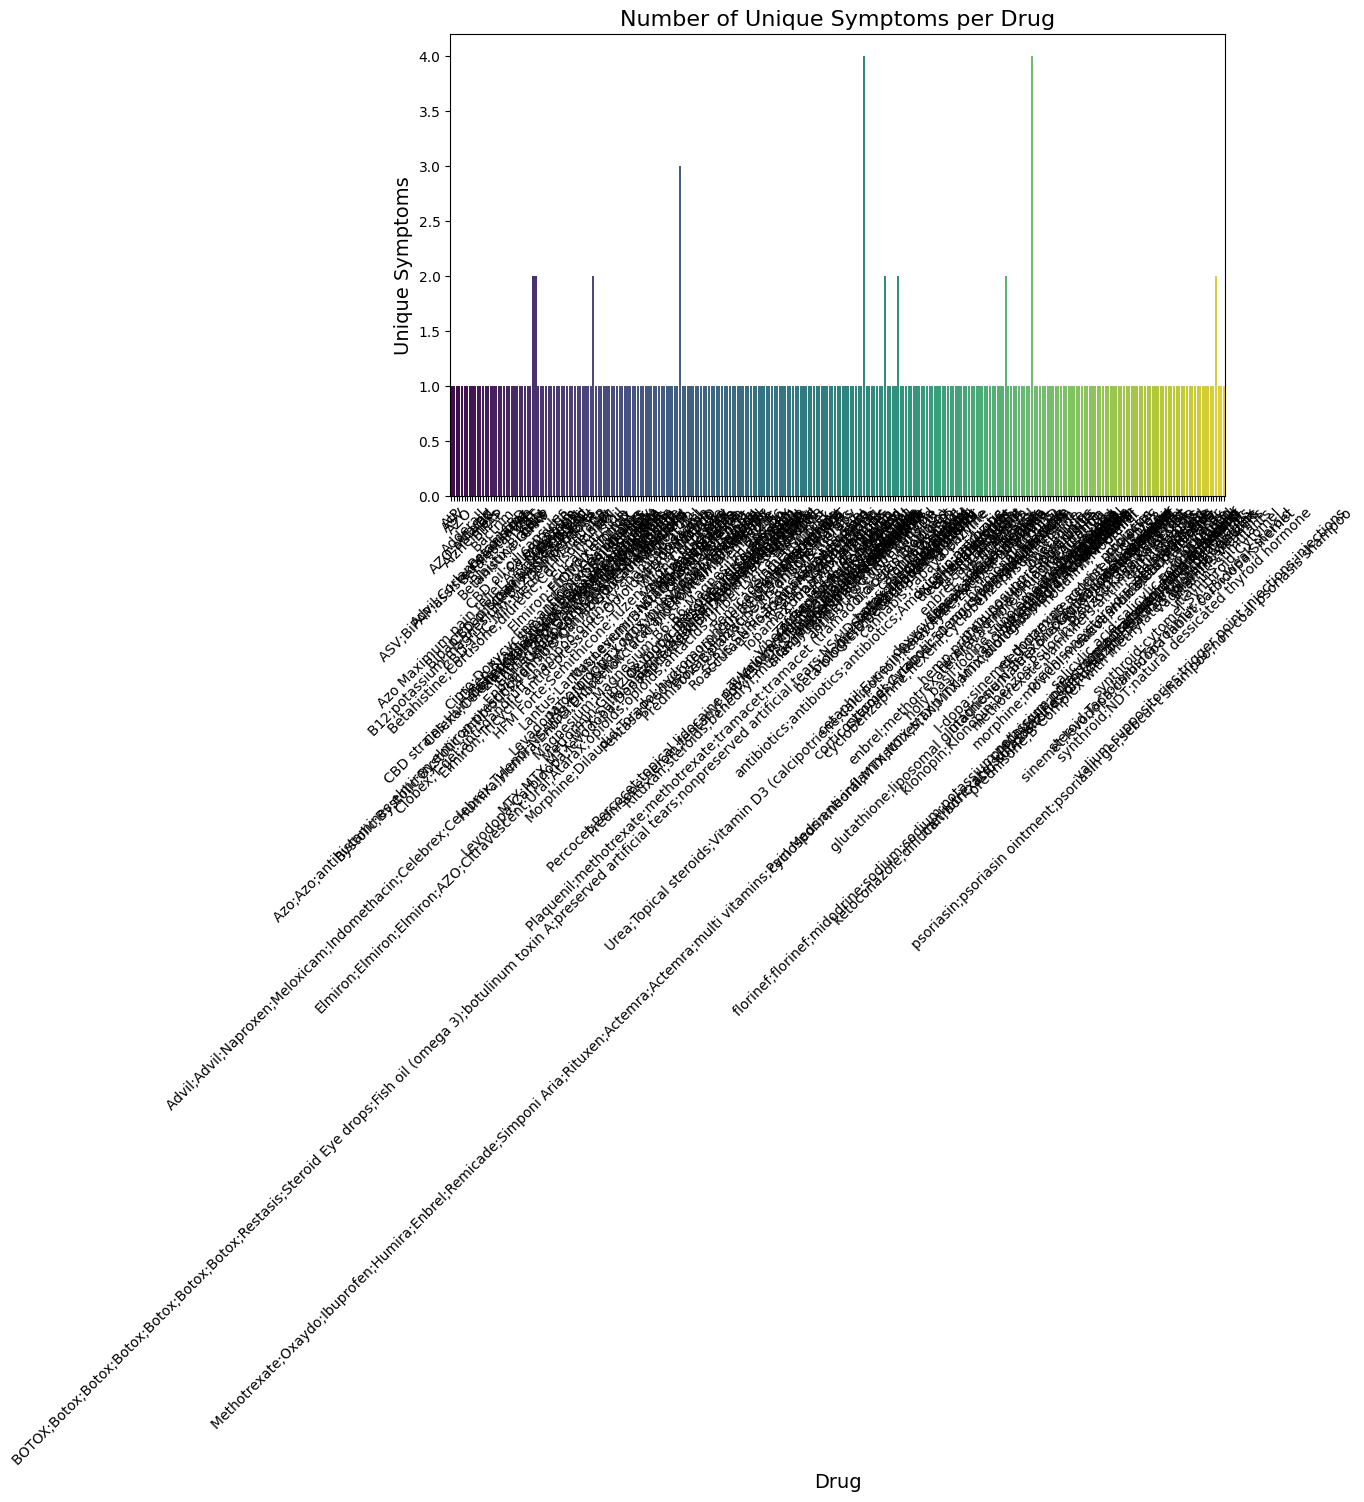

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv("MedRed_AMT_labels.csv")

# Clean the dataset (remove NaN values in relevant columns)
data = data.dropna(subset=["Answer.drugs", "Answer.symptoms"])

# 1. Word Cloud of Drugs
drug_text = " ".join(data["Answer.drugs"].dropna().values)

def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400,
        colormap="viridis"
    ).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

generate_wordcloud(drug_text, "Word Cloud of Drugs")

# 2. Word Cloud of Symptoms
symptom_text = " ".join(data["Answer.symptoms"].dropna().values)
generate_wordcloud(symptom_text, "Word Cloud of Symptoms")

# 3. Frequency of Subreddit Posts (Bar Plot)
subreddit_counts = data['subreddit'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=subreddit_counts.index,
    y=subreddit_counts.values,
    palette="viridis"
)
plt.title("Frequency of Posts in Each Subreddit", fontsize=16)
plt.xlabel("Subreddit", fontsize=14)
plt.ylabel("Post Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 4. Drug vs. Symptom Co-occurrence (Bar Chart)
drug_symptom_pairs = data.groupby('Answer.drugs')['Answer.symptoms'].apply(lambda x: len(x.unique()))

plt.figure(figsize=(10, 6))
sns.barplot(
    x=drug_symptom_pairs.index,
    y=drug_symptom_pairs.values,
    palette="viridis"
)
plt.title("Number of Unique Symptoms per Drug", fontsize=16)
plt.xlabel("Drug", fontsize=14)
plt.ylabel("Unique Symptoms", fontsize=14)
plt.xticks(rotation=45)
plt.show()


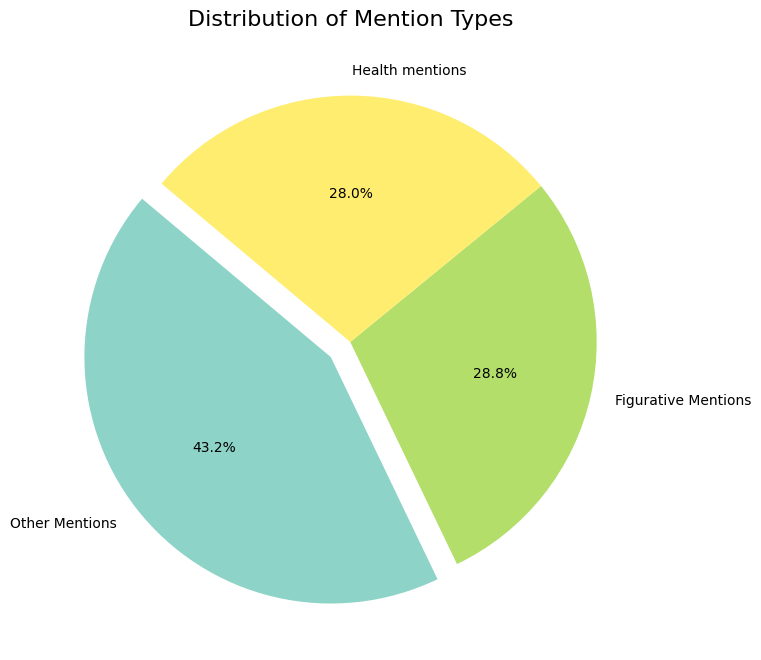

<ipython-input-14-324c608adcc9>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


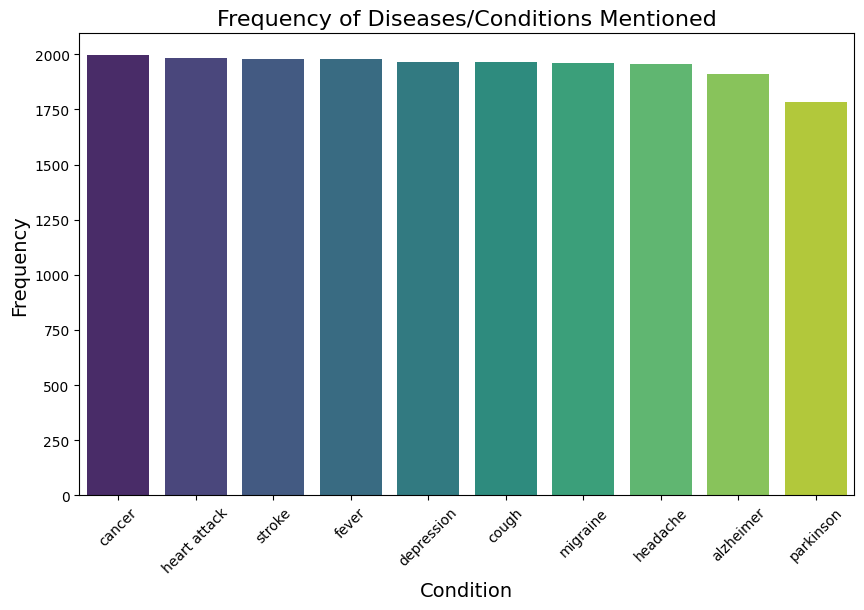

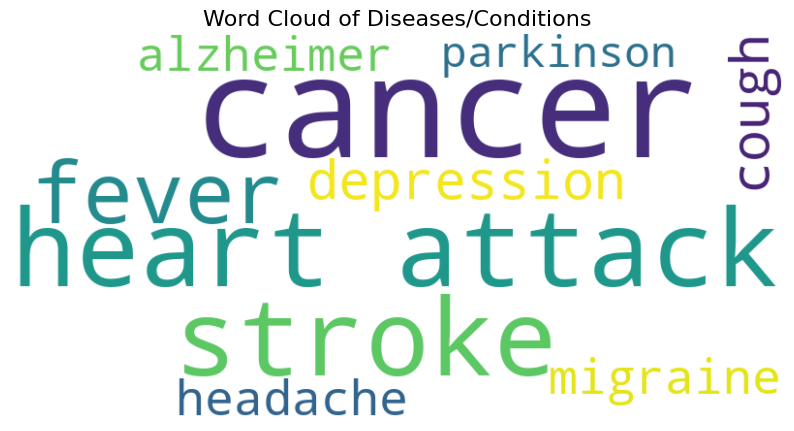

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv("hmc2019.csv")

# 1. Mention Type Distribution (Pie Chart)
mention_type_counts = data['Label'].value_counts()

plt.figure(figsize=(8, 8))
mention_type_counts.plot.pie(
    autopct="%1.1f%%",
    startangle=140,
    cmap="Set3",
    explode=[0.1 if i == 0 else 0 for i in range(len(mention_type_counts))]
)
plt.title("Distribution of Mention Types", fontsize=16)
plt.ylabel("")  # Remove default y-label
plt.show()

# 2. Frequency of Diseases/Conditions (Bar Plot)
condition_counts = data['Description'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=condition_counts.index,
    y=condition_counts.values,
    palette="viridis"
)
plt.title("Frequency of Diseases/Conditions Mentioned", fontsize=16)
plt.xlabel("Condition", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 3. Word Cloud of Diseases/Conditions
condition_text = " ".join(data['Description'].dropna().values)

wordcloud = WordCloud(
    background_color="white",
    width=800,
    height=400,
    colormap="viridis"
).generate(condition_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Diseases/Conditions", fontsize=16)
plt.show()



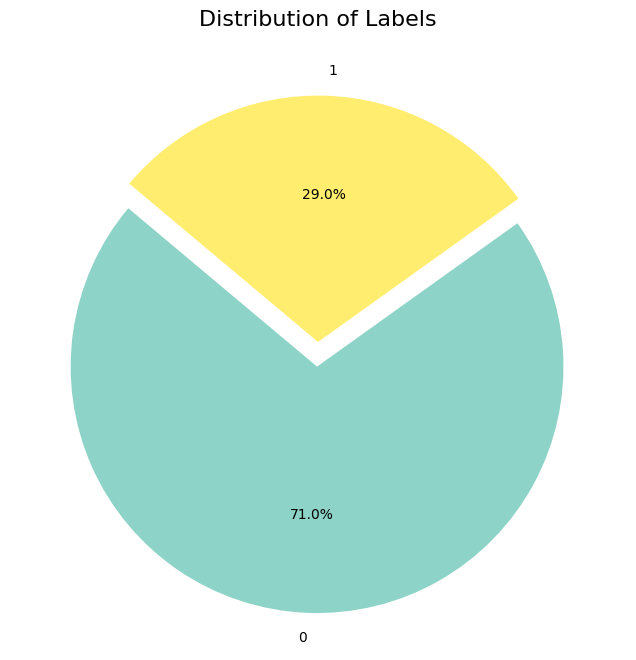

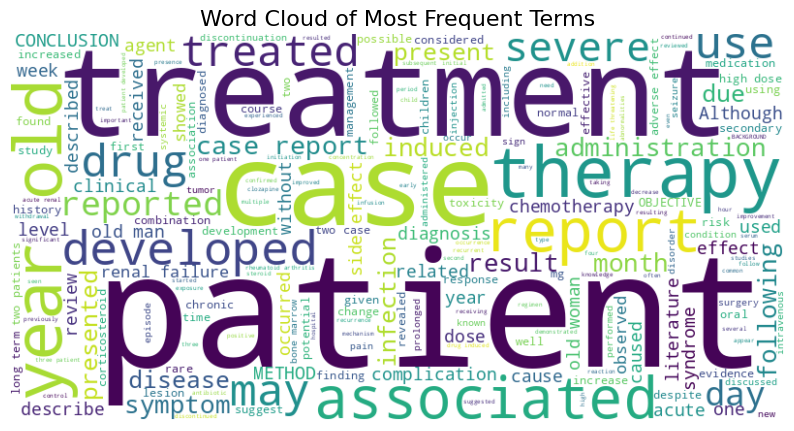

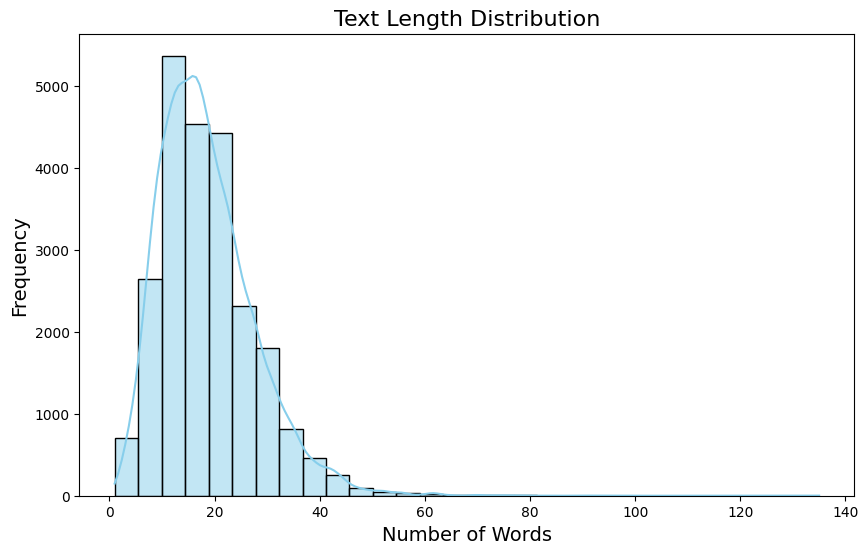

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

# Load the dataset
data = pd.read_csv("output_file.csv")

# 1. Label Distribution (Pie Chart)
label_counts = data['label'].value_counts()

plt.figure(figsize=(8, 8))
label_counts.plot.pie(
    autopct="%1.1f%%",
    startangle=140,
    cmap="Set3",
    explode=[0.1 if i == 0 else 0 for i in range(len(label_counts))]
)
plt.title("Distribution of Labels", fontsize=16)
plt.ylabel("")  # Remove default y-label
plt.show()

# 2. Most Frequent Terms (Word Cloud)
text = " ".join(data['text'].dropna().values)

wordcloud = WordCloud(
    background_color="white",
    width=800,
    height=400,
    colormap="viridis"
).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Frequent Terms", fontsize=16)
plt.show()

# 3. Text Length Distribution (Histogram)
text_lengths = data['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(text_lengths, kde=True, color="skyblue", bins=30)
plt.title("Text Length Distribution", fontsize=16)
plt.xlabel("Number of Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()


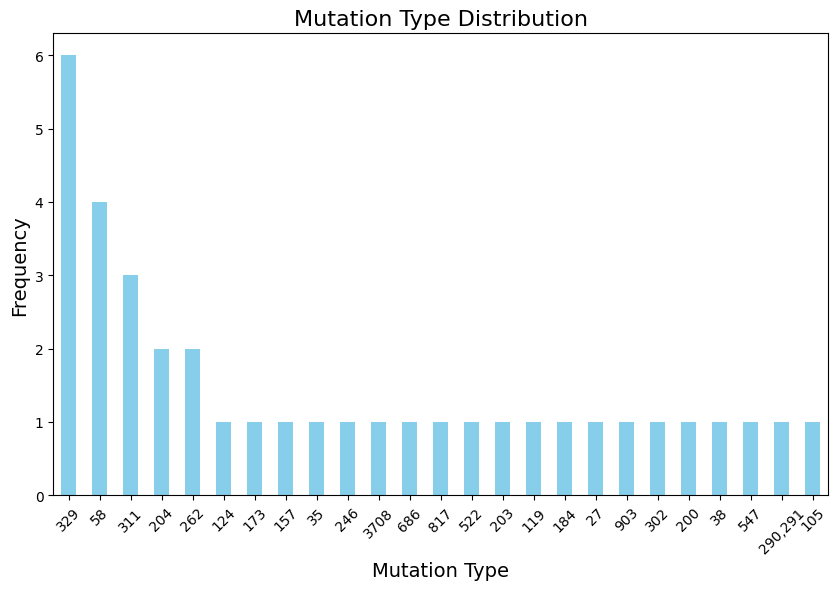

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the dataset
data = pd.read_csv("structured_output.csv")

# 1. Mutation Type Distribution (Bar Chart)
mutation_counts = data['Mutation'].value_counts()

plt.figure(figsize=(10, 6))
mutation_counts.plot(kind='bar', color='skyblue')
plt.title("Mutation Type Distribution", fontsize=16)
plt.xlabel("Mutation Type", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.show()
